# Regresja logistyczna za pomocą sieci neuronowej

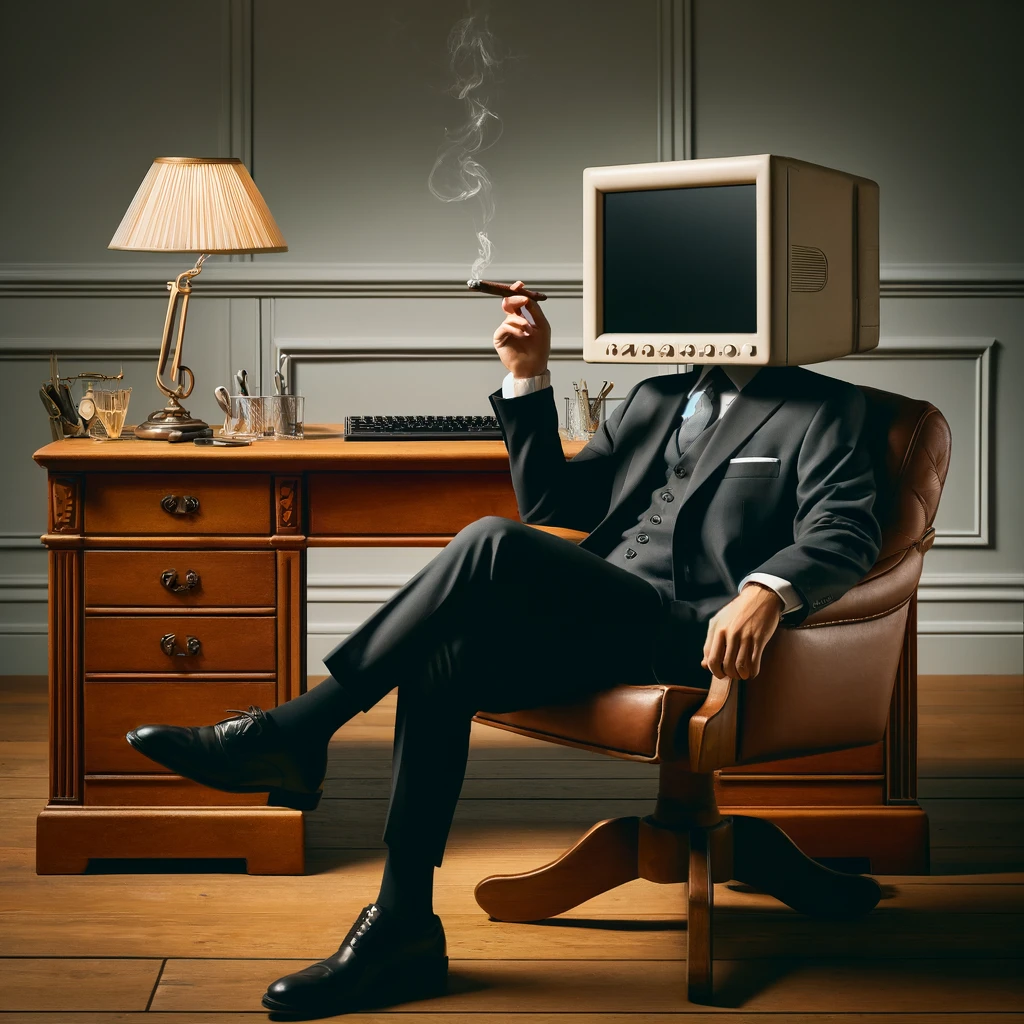

In [21]:
from math import pi
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

In [22]:
def get_data(n_samples, inner_radius=1, ring_inner=1.5, ring_outer=2.5):
  angles = torch.rand(n_samples // 2) * 2 * pi

  # Inner circle
  rs_in = torch.rand(n_samples // 2) * inner_radius
  x1_inner = rs_in * torch.cos(angles)
  x2_inner = rs_in * torch.sin(angles)
  points_inner = torch.cat([x1_inner[:, None], x2_inner[:, None]], dim=1)

  # Outer ring
  rs_out = torch.rand(n_samples // 2) * (ring_outer - ring_inner) + ring_inner
  x1_outer = rs_out * torch.cos(angles)
  x2_outer = rs_out * torch.sin(angles)
  points_outer = torch.cat([x1_outer[:, None], x2_outer[:, None]], dim=1)

  X = torch.cat([points_inner, points_outer])
  y = torch.cat([torch.zeros(n_samples // 2), torch.ones(n_samples // 2)])
  return X, y

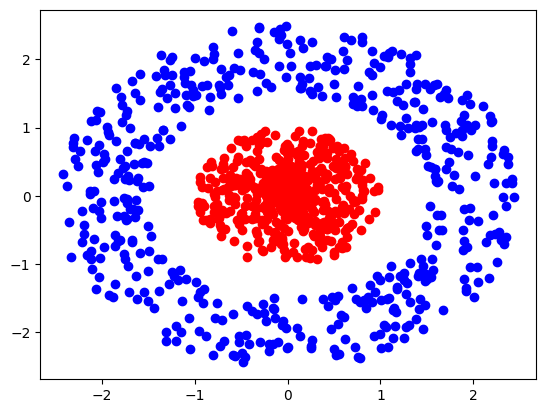

In [23]:
X, y = get_data(1000)

plt.scatter(X[y == 0, 0], X[y == 0, 1], c='red')
plt.scatter(X[y == 1, 0], X[y == 1, 1], c='blue')
plt.show()

# Regresja logistyczna revisited

In [24]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))


def cross_entropy_loss(y, probs, eps=0):
  return - (y * torch.log(probs + eps) + (1 - y) * torch.log(1 - probs + eps)).mean()


class LogisticRegression(nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.W = nn.Parameter(torch.rand(2, 1))
    self.b = nn.Parameter(torch.zeros(1))

  def forward(self, X):
    z = X @ self.W + self.b #f
    probs = sigmoid(z)
    return probs

In [25]:
n_epochs = 1000
learning_rate = 1e-1

model = LogisticRegression()
optimizer = torch.optim.SGD(list(model.parameters()), lr=learning_rate)
bce_loss = nn.BCELoss()

for i in range(n_epochs):
  probs = model(X)
  loss = bce_loss(probs.squeeze(), y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i % 100 == 0:
    print(f'Epoch {i} Cross entropy {loss.item():.4f}')

Epoch 0 Cross entropy 0.7244
Epoch 100 Cross entropy 0.6926
Epoch 200 Cross entropy 0.6925
Epoch 300 Cross entropy 0.6925
Epoch 400 Cross entropy 0.6925
Epoch 500 Cross entropy 0.6925
Epoch 600 Cross entropy 0.6925
Epoch 700 Cross entropy 0.6925
Epoch 800 Cross entropy 0.6925
Epoch 900 Cross entropy 0.6925


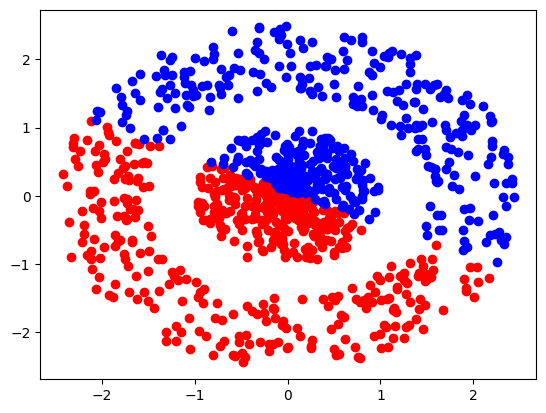

In [26]:
with torch.no_grad():
  probs = model(X).squeeze(1)

y_pred = torch.where(probs >= 0.5, 1, 0)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c='red')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue')
plt.show()

# Kwadratowa regresja logistyczna 

In [27]:
def sigmoid(x):
  return 1 / (1 + torch.exp(-x))


def cross_entropy_loss(y, probs, eps=0):
  return - (y * torch.log(probs + eps) + (1 - y) * torch.log(1 - probs + eps)).mean()


class LogisticRegression(nn.Module):
  def __init__(self):
    super(LogisticRegression, self).__init__()
    self.W = nn.Parameter(torch.rand(2, 1))
    self.b = nn.Parameter(torch.zeros(1))

  def forward(self, X):
    z = X @ self.W + self.b
    probs = sigmoid(z)
    return probs
  
X2 = X.clone()
X2[:,0] = X2[:,0]**2
X2[:,1] = X2[:,1]**2

n_epochs = 1000
learning_rate = 1e-1

model = LogisticRegression()
optimizer = torch.optim.SGD(list(model.parameters()), lr=learning_rate)
bce_loss = nn.BCELoss()

for i in range(n_epochs):
  probs = model(X2)
  loss = bce_loss(probs.squeeze(), y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i % 100 == 0:
    print(f'Epoch {i} Cross entropy {loss.item():.4f}')

Epoch 0 Cross entropy 0.4853
Epoch 100 Cross entropy 0.2117
Epoch 200 Cross entropy 0.1354
Epoch 300 Cross entropy 0.1005
Epoch 400 Cross entropy 0.0805
Epoch 500 Cross entropy 0.0675
Epoch 600 Cross entropy 0.0583
Epoch 700 Cross entropy 0.0515
Epoch 800 Cross entropy 0.0461
Epoch 900 Cross entropy 0.0419


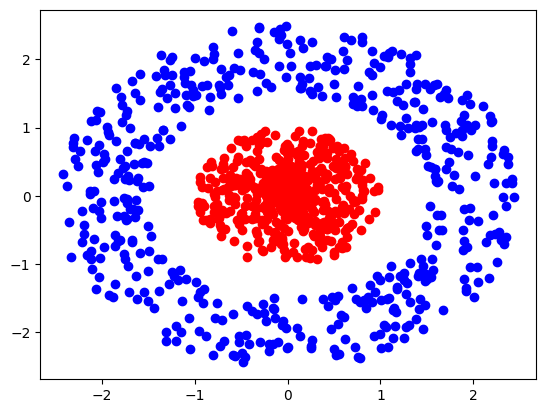

In [28]:
with torch.no_grad():
  probs = model(X2).squeeze(1)

y_pred = torch.where(probs >= 0.5, 1, 0)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c='red')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue')
plt.show()

# Sieć neuronowa 😎

In [7]:
class NeuralNet(nn.Module):
  def __init__(self, hidden_size=4):
    super(NeuralNet, self).__init__()
    self.W1 = nn.Parameter(torch.randn(2, hidden_size))
    self.b1 = nn.Parameter(torch.zeros(hidden_size))
    self.W2 = nn.Parameter(torch.randn(hidden_size, 1))
    self.b2 = nn.Parameter(torch.zeros(1))

  def forward(self, X):
    Z1 = X @ self.W1 + self.b1
    A1 = sigmoid(Z1)
    Z2 = A1 @ self.W2 + self.b2
    probs = sigmoid(Z2)
    return probs
  


    # def forward(self, X):
    # z = X @ self.W + self.b
    # probs = sigmoid(z)
    # return probs

In [8]:
n_epochs = 4000
learning_rate = 1e-1

model = NeuralNet(hidden_size=4)
optimizer = torch.optim.SGD(list(model.parameters()), lr=learning_rate)
bce_loss = nn.BCELoss()

for i in range(n_epochs):
  probs = model(X)
  loss = bce_loss(probs.squeeze(), y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i % 500 == 0:
    print(f'Epoch {i} Cross entropy {loss.item():.4f}')

Epoch 0 Cross entropy 0.7606
Epoch 500 Cross entropy 0.6587
Epoch 1000 Cross entropy 0.4848
Epoch 1500 Cross entropy 0.2927
Epoch 2000 Cross entropy 0.1876
Epoch 2500 Cross entropy 0.1344
Epoch 3000 Cross entropy 0.1045
Epoch 3500 Cross entropy 0.0858


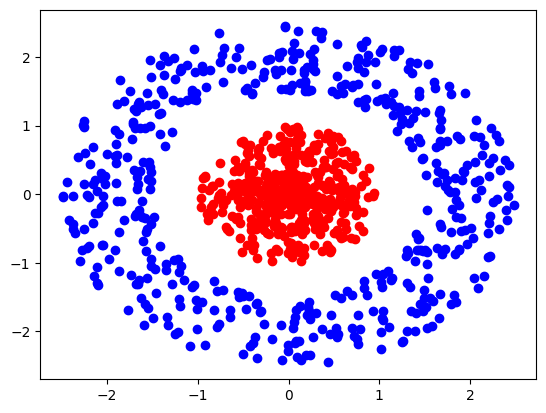

In [9]:
with torch.no_grad():
  probs = model(X).squeeze(1)

y_pred = torch.where(probs >= 0.5, 1, 0)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c='red')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue')
plt.show()

# Sieć neuronowa z pełnym wykorzystaniem Pytorcha

In [10]:
class NeuralNetV2(nn.Module):
  def __init__(self, hidden_size=4):
    super(NeuralNetV2, self).__init__()
    self.layers = nn.Sequential(
        nn.Linear(2, hidden_size),
        nn.Sigmoid(),
        nn.Linear(hidden_size, 1),
        nn.Sigmoid()
    )

  def forward(self, X):
    return self.layers(X)

In [11]:
n_epochs = 4000
learning_rate = 1e-1

model = NeuralNetV2(hidden_size=4)
optimizer = torch.optim.SGD(list(model.parameters()), lr=learning_rate)
bce_loss = nn.BCELoss()

for i in range(n_epochs):
  probs = model(X)
  loss = bce_loss(probs.squeeze(), y)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if i % 500 == 0:
    print(f'Epoch {i} Cross entropy {loss.item():.4f}')

Epoch 0 Cross entropy 0.7076
Epoch 500 Cross entropy 0.6833
Epoch 1000 Cross entropy 0.6346
Epoch 1500 Cross entropy 0.4698
Epoch 2000 Cross entropy 0.2956
Epoch 2500 Cross entropy 0.1987
Epoch 3000 Cross entropy 0.1472
Epoch 3500 Cross entropy 0.1169


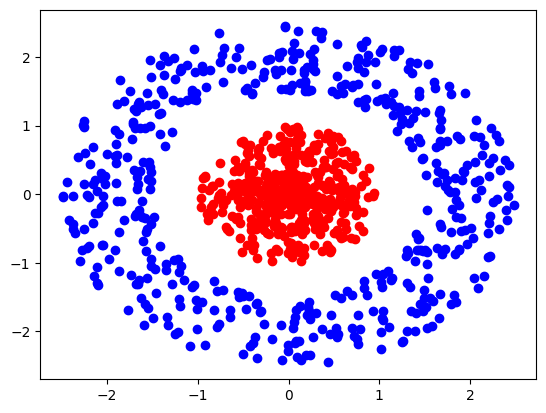

In [12]:
with torch.no_grad():
  probs = model(X).squeeze(1)

y_pred = torch.where(probs >= 0.5, 1, 0)
plt.scatter(X[y_pred == 0, 0], X[y_pred == 0, 1], c='red')
plt.scatter(X[y_pred == 1, 0], X[y_pred == 1, 1], c='blue')
plt.show()